# Practice 6

### Gradient Descent

In [36]:
# Step 1: Load the data (what was observed)
import pandas as pd
data = pd.DataFrame([
    {'engine_run_time':6, 'fuel_avg':2},
    {'engine_run_time':7, 'fuel_avg':3.5},
    {'engine_run_time':5., 'fuel_avg':1.9},
    {'engine_run_time':9.1, 'fuel_avg':4.5},
    {'engine_run_time':2., 'fuel_avg':0.2},
    {'engine_run_time':8, 'fuel_avg':3.8},
    {'engine_run_time':1.3, 'fuel_avg':0.1},
    {'engine_run_time':2.9, 'fuel_avg':0.5},
])

In [37]:
# Step 2: Fit a **Random** line
#y =ax+b
a = 1
b = 8
data['initialPrediction'] = (data['engine_run_time']*a)+b
data

,engine_run_time,fuel_avg,initialPrediction
0,6.0,2.0,14.0
1,7.0,3.5,15.0
2,5.0,1.9,13.0
3,9.1,4.5,17.1
4,2.0,0.2,10.0
5,8.0,3.8,16.0
6,1.3,0.1,9.3
7,2.9,0.5,10.9


In [38]:
# Step 3: Calculate the MSE of this random line
from sklearn.metrics import mean_squared_error
mean_squared_error(data['initialPrediction'], data['fuel_avg'])

124.48750000000001

<Axes: xlabel='engine_run_time', ylabel='fuel_avg'>

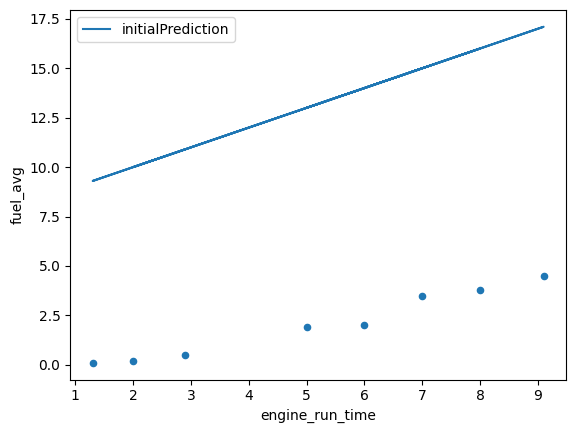

In [40]:
# Step 4: Draw the points and the random line
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

ax = data.plot.scatter(x='engine_run_time', y='fuel_avg')
#data.set_index('engine_run_time')['initialPrediction'].plot.line(ax=ax)
data.plot.line(x='engine_run_time', y = 'initialPrediction', ax=ax)


Text(0, 0.5, 'MSE')

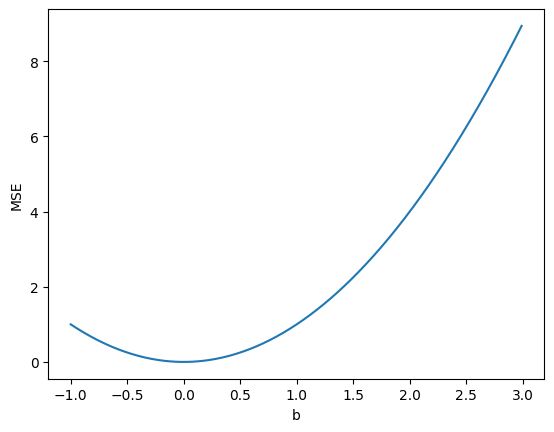

In [41]:
# Step 4: (Only for illustration purpose)
# Visualize the effect of the weight (a) on the MSE
from sklearn.metrics import mean_squared_error
import numpy as np

results = []
for bias in np.arange(-1,3,0.01):
    pred = (((data['engine_run_time']*(a)))+bias)
    results.append({
        'b':bias,
        'mse':mean_squared_error(data['engine_run_time'],pred)
    })
ax = pd.DataFrame(results).set_index('b')['mse'].plot.line()
ax.set_ylabel('MSE')

$
L = \frac{1}{n}\Sigma_{i=1}^{n}{\Big(y_i - \hat{y_i}\Big)^2}
$

$
\frac{\partial L}{\partial a}  = \frac{-2}{n}\Sigma_{i=1}^{n}{x_i\Big(y_i - \hat{y_i}\Big)}
$

$
\frac{\partial L}{\partial b} = \frac{-2}{n}\Sigma_{i=1}^{n}{\Big(y_i - \hat{y_i}\Big)}
$

**Update rules**

newValue = previousValue - (learningRate * derivative).


In [32]:
# Step 5: Create function to calculate derivatives and update the values
def derivativeSlope(df, x_col, y_col, a, i):
    return (-2/df.shape[0])*(df[x_col]*(df[y_col] - ((a * df[x_col])+i))).sum()

def derivativeIntercept(df, x_col, y_col, m, i):
    return (-2/df.shape[0])*((df[y_col] - ((m * df[x_col])+i))).sum()

def update(old_value, derivative, learningRate=0.005):
    return old_value - (learningRate*derivative)

In [33]:
# Step 6: Improving the random line by adjusting the new weight (a) and the new intercept (b)
derivativeS = derivativeSlope(data, 'engine_run_time', 'fuel_avg', a, b)
newM = update(a, derivativeS)
derivativeI = derivativeIntercept(data, 'engine_run_time', 'fuel_avg', a, b)
newI = update(b, derivativeI)

data['PredictionGDiter1'] = (data['engine_run_time']*newM)+newI

previous_mse = mean_squared_error(data['initialPrediction'], data['fuel_avg'])
new_mse = mean_squared_error(data['PredictionGDiter1'], data['fuel_avg'])

print ('Slope went from {} to {} and intercept from {} to {}'.format(a, newM, b, newI))
print ('MSE went from {} to {}'.format(previous_mse, new_mse))
#print(f'MSE went from {previous_mse} to {new_mse}')

Slope went from 1 to 0.397525 and intercept from 8 to 7.889
MSE went from 124.48750000000001 to 62.422610184758604


In [34]:
# Step 7: Further improving the random line by adjusting the weight (a) and the intercept (b) many times
newA = a
newB = b

for _ in range(2000):
    a = newA
    b = newB

    derivativeS = derivativeSlope(data, 'engine_run_time', 'fuel_avg', newA, newB)
    newA = update(newA, derivativeS)

    derivativeI = derivativeIntercept(data, 'engine_run_time', 'fuel_avg', newA, newB)
    newB = update(newB, derivativeI)

    print ('Iteration {} Slope:{} and intercept:{} MSE:{}'.format(_, newA, newB, mean_squared_error((data['engine_run_time']*newA)+newB, data['fuel_avg'])))

    if np.abs(newA - a) < 0.001 and np.abs(newB - b) < 0.001:
        break

    # Or use the change in MSE for convergance


Iteration 0 Slope:0.397525 and intercept:7.920102771875 MSE:62.91367780378401
Iteration 1 Slope:0.0031953222144530113 and intercept:7.861361785646929 MSE:36.39352276508641
Iteration 2 Slope:-0.2545670358959665 and intercept:7.816515191018589 MSE:24.95496000596801
Iteration 3 Slope:-0.42272618801408085 and intercept:7.78079827856463 MSE:20.003178254099605
Iteration 4 Slope:-0.5320964596513615 and intercept:7.7510847755084855 MSE:17.840184741876556
Iteration 5 Slope:-0.6028958963317992 and intercept:7.72532342840153 MSE:16.87535102770802
Iteration 6 Slope:-0.6483900592289685 and intercept:7.70216833092521 MSE:16.424800148844664
Iteration 7 Slope:-0.6772828106308327 and intercept:7.680736372714775 MSE:16.194704650972884
Iteration 8 Slope:-0.6952849680872344 and intercept:7.660448095465131 MSE:16.058952377099878
Iteration 9 Slope:-0.706143537634981 and intercept:7.640923274640885 MSE:15.963500988631287
Iteration 10 Slope:-0.7123170194624507 and intercept:7.621912408024225 MSE:15.8852480273

<Axes: xlabel='engine_run_time', ylabel='fuel_avg'>

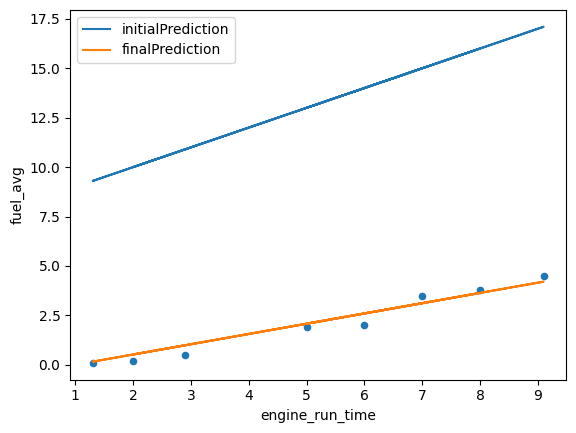

In [35]:
# Step 4: Draw the points and the random line
from matplotlib import pyplot as plt

data['finalPrediction'] = (data['engine_run_time']*newA)+newB

ax = data.plot.scatter(x='engine_run_time', y='fuel_avg')
data.set_index('engine_run_time')[['initialPrediction', 'finalPrediction']].plot.line(ax=ax)
